#### Data Science - Coursework 2 (50%)
# What caused this gravitational wave signal?
## Deadline Friday week 11, 2pm.

#### Instructions

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 50% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Science-2024/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework.

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a PDF file. **Don't forget to click `run all` before you export it**. You can constantly update this document until the deadline.
- The breakdown of the assessment criteria is provided in Learning Central under Assessment.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- It is estimated that the workload required for this CA is approximately 30-35 hours.

<div class="alert-info">
Please also take note of the University’s policy on plagiarism, which is outlined in your student handbook.
 </div>

Plagiarism is the act of passing off the words or ideas of others as if your own. Advice on avoiding plagiarism is given in the UG Student Handbook. There is also considerable help and advice on Learning Central and the University web site. Students need to be especially careful of plagiarism in computing tasks and you are advised not to share code through electronic means. Students working together during their weekly exercises and the coursework is great (and indeed encouraged) but need to ensure that they are not using each other's code or text.

This coursework will be submitted via Learning Central's Turnitin which automatically checks for plagiarism.

#### Tips


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You will find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part A - Some background [15 marks]

**Answer:**

How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging?

The LIGO and VIRGO team produced a plot of spacetime strain (deltaL/L) over time (s) for the Gravitational wave event in 2015. This wave was then used as the true data with which we could compare model wave data called templates. The templates can be scaled in amplitude and phase with Mass (M) and Distance (D) with 2 known equations.

$$t_{ref} = (\frac{M_{ref}}{M_*})t$$

and

$$h(t,M,D) = \frac{M}{M_{ref}} \frac{D_{ref}}{D} h(t_{ref})$$

After scaling the wave fit can be measured with a test like Chi^2 or a Bayesian likelihood. When the waves matched they had a combined mass of \~65 solar masses. Utilizing Bayesian inference they concluded the 2 objects had individual masses of 35 and 33 +-\~5 Solar mass with a distance of 440 +-\~150Mpc.

Given the period of the wave (2 waves for every orbit of the pair) it was deduced that the 2 were orbiting just a few Schwarzschild radii from each other just before merger. Meaning they had to have small physical radii to not already have merged. And such massive tiny objects are the very definition of blackholes.


Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.

Gravitational waves from compact binary inspiraling and merging stars with the inspiral stage. The 2 objects are orbiting and losing energy via gravitational waves, as the wave period is double the orbital period this starts as a super low frequency signal that takes hundreds to thousands of years to climb to the frequency range the LIGO can detect.

Infall lasts until the merger phase, this is the point of highest amplitude in the strain graph and lasts for only a fraction of a second.

Next is the ring down phase, where the gravitational wave decays.

And while not part of the gravitational wave itself, I would like to include the noise dominated phase of the waveform, due to many factors in the laser, mirrors and environment, that remains after the ringdown.

Loading the data from GravitationalWaveEvents.csv and displaying headers and first few entries to ensure correct loading and inspect data.

In [39]:
#Load and show data
GravWavDat=pd.read_csv('/content/gravitationalwaveevents.csv')
print(GravWavDat.head())

       DL  DL_err  Mtot  Mtot_err  Mchirp  Mchirp_err detType
0   430.0   170.0  63.1       3.0    28.6        -1.5      GW
1  1060.0   480.0  35.7       3.8    15.2        -1.1      GW
2   440.0   190.0  20.5       1.5     8.9        -0.3      GW
3   960.0   410.0  49.1       3.9    21.5        -1.7      GW
4   320.0   110.0  17.8       0.7     7.9        -0.2      GW


Having seen that luminosity distance and total mass both have error values I will use matplotlib.plot.errorbar to show all the informaton we have.

Text(0.5, 1.0, 'Gravitational Wave Data: Luminosity Distance vs Total Mass')

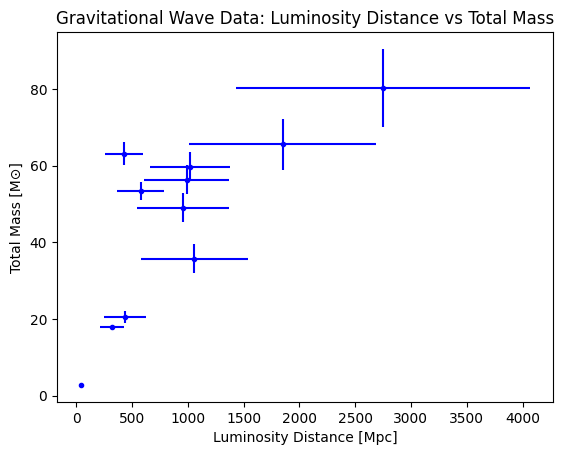

In [40]:
#plot Mass vs Distance, with errors
plt.errorbar(GravWavDat['DL'],GravWavDat['Mtot'],GravWavDat['Mtot_err'],GravWavDat['DL_err'],'b.')
plt.xlabel('Luminosity Distance [Mpc]')
plt.ylabel('Total Mass [M⊙]')
plt.title('Gravitational Wave Data: Luminosity Distance vs Total Mass')

I have noticed a potential trend in the data, I believe there to be a positive correlation between mass and distance.
But I cannot just go from visual approximations. I have been taught tools to test for this.

In [41]:
from scipy.stats import spearmanr

eventsR, eventsP = spearmanr(GravWavDat['Mtot'], GravWavDat['DL'])

print(f"Spearman's correlation coefficient: {eventsR:.3f}")
print(f"P-value: {eventsP:.3f}")

Spearman's correlation coefficient: 0.709
P-value: 0.015


The spearmans correlation coefficient of 0.71 is interpreted as a strong positive correlation between mass and distance. With a P-Value of 0.015, which falls comfortably under the accepted threshold of 0.05, I am confident to say this.

The correlation is easily explained by thinking about the nature of the detectors, the rarity of these events and the nature of 3d space around us.

Gravitational wave amplitude decreases with distance as 1/r, which limits our ability to detect low-mass systems at large distances. Similarly, the apparent lack of high-mass binaries at close distances reflects their intrinsic rarity, with detections typically occurring at larger distances due to the increased observational volume. The chances of detecting such systems grow with r^3, as the observable volume expands.

I have noticed the errors and regret that the built in spearman function for scipy does not offer a weighted version. It should be possible to construct a weighted version but as this is a side curiosity rather than question requirement I shall leave it as an exercise for the marker.

***

## Part B - The data [15 marks]

**Answer:**

The plan for part **B.1** is to read the waveform Observedwaveform.csv to a pandas dataframe. We can then plot to visually determine the minimum and maximum time of the event. The approximate location of the amplitude maxima. And estimate the expected noise in the post ring down "silence"


Strain mean 0.00


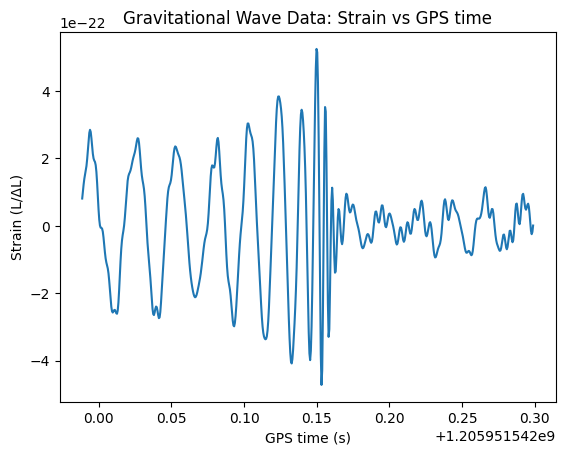

In [42]:
'''Read in the data table for GW event'''

ObsGravWav=pd.read_csv('/content/Observedwaveform.csv')
# print(ObsGravWav.head())


'''plot to inspect current state of data'''

plt.plot(ObsGravWav['time (s)'],ObsGravWav['strain'])
plt.xlabel('GPS time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs GPS time')

print(f"Strain mean {ObsGravWav['strain'].mean():.2f}")


A strain mean of 0 shows no unexpected bias in the data. Waves are symmetrical and a mean of 0 gives evidence of the data set also being symmetrical.



---



For Part **B.2** we are given the GPStime of the merger.

To match with the model data, the observation times will need to be altered so that the merger occurs at time = 0 secs.

This is achieved by subtracting the GPS time from every element in the 'time' array. The output is then stored in a new array 'mergeTime' leaving the old 'GPS time' in place so we can return to GPS time if we are required to.

Text(0.5, 1.0, 'Gravitational Wave Data: Strain vs Merger time')

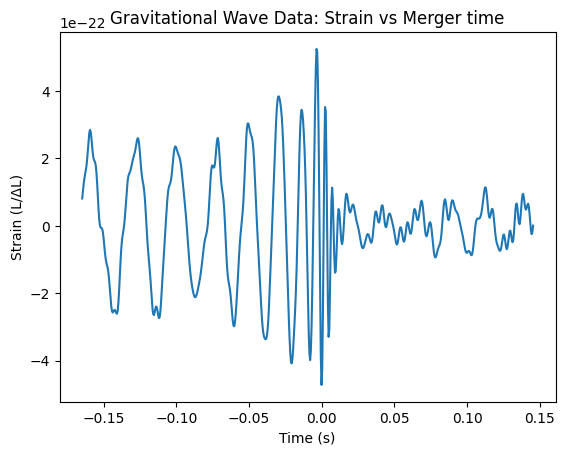

In [43]:
'''Make variable for merger time and take this away from merge data to have merge at t=0, make new field in data for this time'''
GPSMergeTime = 1205951542.153363

ObsGravWav['mergeTime'] = ObsGravWav['time (s)'] - GPSMergeTime

plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Strain vs Merger time')

This plot handily shows that the waveform has not been changed in the transformation at all, just the time coordinate

In Part **B.3** we are asked to estimate the average noise and its standard deviation in our data. This will be used later in our likelihood function.

We start by trying to isolate the merge free data after the event, i.e time >0. If there is no active merger then there should only be noise found in the data.

Text(0.5, 1.0, 'Gravitational Wave Data: RingDown And Noise')

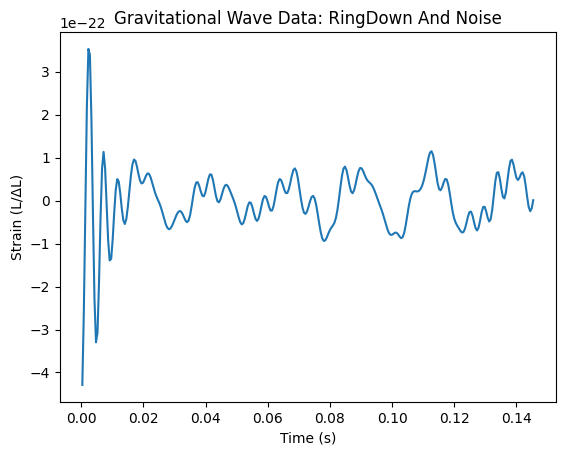

In [44]:
'''To estimate noise, truncate data to only have t>0
Merger is now finsihed we should only have noise in data'''
#chat gpt help to select the entires corrosponding to t>0 from the pandas data frame

positive_time_values = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0, ['mergeTime', 'strain']]

# print(positive_time_values)

plt.plot(positive_time_values['mergeTime'],positive_time_values['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: RingDown And Noise')

This approach of taking the data with merge time >0 visibly leaves some of the merger event ring down in the data. The "smooth" decaying sine wave from $$t = 0s$$ to $$t ≈ 0.015s$$

We can remove this by altering the time we wish to take the data from 0s to 0.015s.

Text(0.5, 1.0, 'Gravitational Wave Data: Noise Profile')

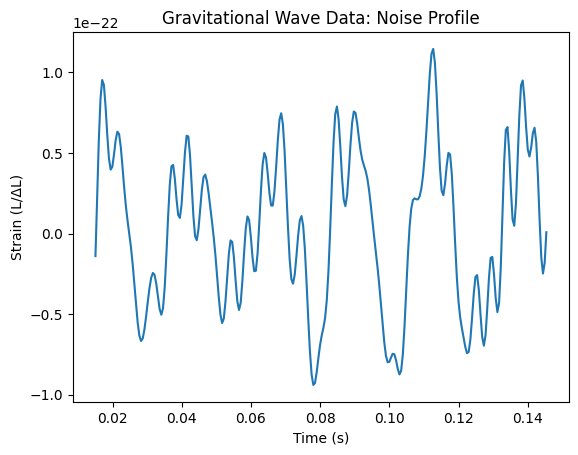

In [45]:
#new lower bound on time

positive_time_values_2 = ObsGravWav.loc[ObsGravWav['mergeTime'] > 0.015, ['mergeTime', 'strain']]

plt.plot(positive_time_values_2['mergeTime'],positive_time_values_2['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Gravitational Wave Data: Noise Profile')

This data look much more uniformly 'noisy' without an obvious behaviour.
With data validity considered we can take the mean and standard deviation of the signal free noise region.

In [46]:
#using pandas built in functions we can get the mean and standard deviation
noiseMean = positive_time_values_2['strain'].mean()
noiseStd = positive_time_values_2['strain'].std()

print(f"The mean of our noise is {noiseMean:.3e} with StdDev {noiseStd:.3e}")

The mean of our noise is 3.696e-24 with StdDev 4.858e-23


The noise has a mean value of 0, I would of expected it to be zero in this case.. but maybe this is a small selection size effect, but the noise is 2 orders of magnitude smaller then out signal so I deem this acceptable.

To state our result for part **B.3** the mean of our noise is 3.696e-24 with StdDev 4.858e-23


***

## Part C - Interpolate reference model to match the observed data time sampling [15 marks]

Here in part **C.1** I will load the mock data to a pandas Dataframe.
The first few lines are printed to inform me as to what names are used as column headers and let me check that there are no obvious data errors.

Then plot the data to inspect that we have identifiable merger and ringdown and that the merger takes place at t=0.

And finally store and print the smallest value in the time arrays, and print as output.

         strain  time (s)
0  1.545156e-19 -0.164658
1  1.171263e-19 -0.164170
2  1.082966e-19 -0.163681
3  1.389174e-19 -0.163193
4  2.190045e-19 -0.162704
The minimum time in this data set is -0.16466


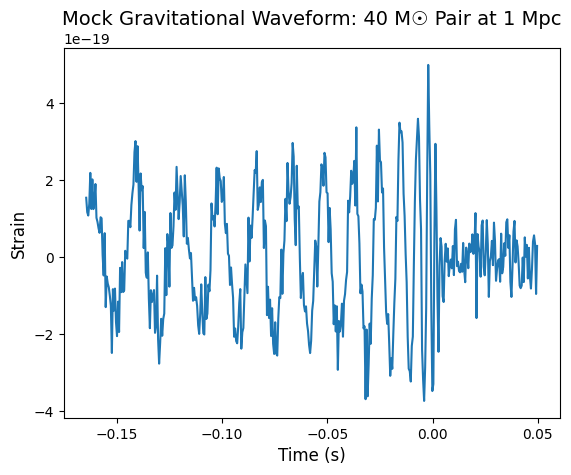

In [47]:
mock40M1D=pd.read_csv('/content/mockdata_waveform_40Msun_1Mpc.csv')
print(mock40M1D.head())

plt.plot(mock40M1D['time (s)'],mock40M1D['strain'])
plt.title('Mock Gravitational Waveform: 40 M☉ Pair at 1 Mpc', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)

mock40M1Dtmin = mock40M1D['time (s)'].min()
print(f"The minimum time in this data set is {mock40M1Dtmin:.5f}") #5 digits chosen as we do not see variability before the 4th

The minimum time in our mock data set is t = -0.16466s

Now we need to trim the Observed waveform to match these time constraints $$(t_{min} < t < 0 )$$ and plot the data in line with the question requirements

Text(0, 0.5, 'Strain')

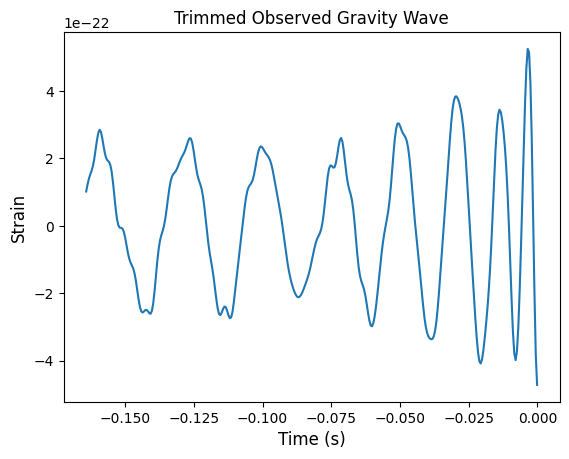

In [48]:
trimmedObsWav = ObsGravWav.loc[(ObsGravWav['mergeTime'] > mock40M1Dtmin) & (ObsGravWav['mergeTime'] < 0), ['strain', 'mergeTime']]


plt.plot(trimmedObsWav['mergeTime'],trimmedObsWav['strain'])
plt.title('Trimmed Observed Gravity Wave')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)

For Part **C.2** we need to read in the 40M reference wave. The usual checks of header data are performed.

In [49]:
''' Pandas builtin read_csv is exactly what I need here'''
refWave = pd.read_csv('/content/reference_waveform_40Msun_1Mpc.csv')
print(refWave.head())

         strain   time (s)
0 -6.162294e-20 -11.946102
1 -6.140841e-20 -11.945614
2 -6.113607e-20 -11.945126
3 -6.080617e-20 -11.944637
4 -6.041902e-20 -11.944149


With header names and expected values in mind, we can plot the data to see what we are starting with.

Text(0, 0.5, 'Strain')

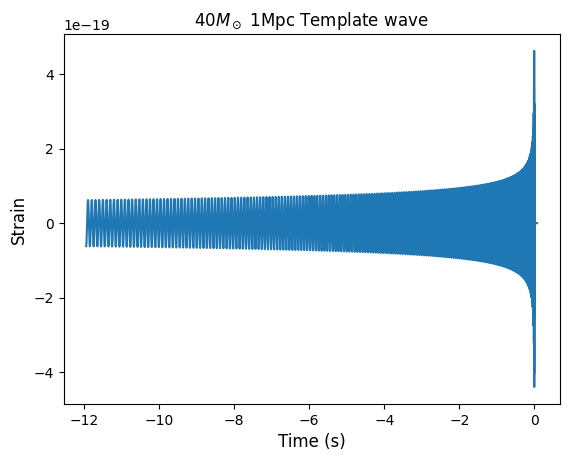

In [50]:
plt.plot(refWave['time (s)'],refWave['strain'])
plt.title(r'40$M_\odot$ 1Mpc Template wave')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)

Plotting the entire wave shows the need to interpolate, not just for matching x values for comparison but also as the reference wave is sooooooo long. 12 seconds compared to our sub second observed wave data.

To perform the interpolation, I will use the suggested code from the question statement. This will take our reference wave and model a mathematical function on it, so when we provide new times or x values it will provide strains that match the new times but follow the 'shape' of the old strain.

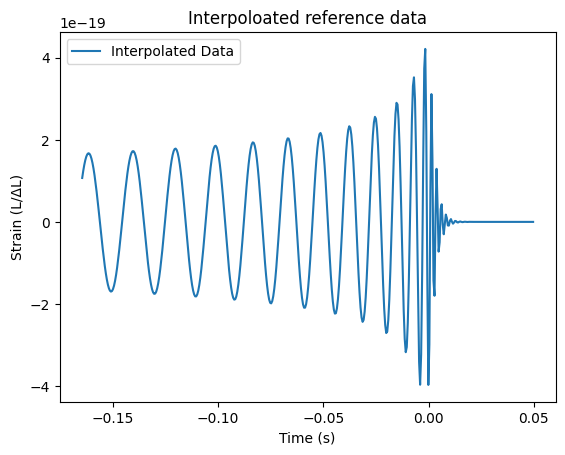

In [123]:
'''
Interpolation code from Project statement
'''
from scipy.interpolate import interp1d
# get interpolation object using a reference waveform with ref_x (time) and ref_y (strain).
interp_fn = interp1d(refWave['time (s)'],refWave['strain'],bounds_error=False)
# now interpolate the data waveform
interp_strain = interp_fn(mock40M1D['time (s)'])
# plot
plt.plot(mock40M1D['time (s)'],interp_strain, label = "Interpolated Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Interpoloated reference data')
plt.legend()


This data looks great to my eye, but to confirm we will overlay the 2 data sets (The interpolated reference wave and the mock data) to confirm.

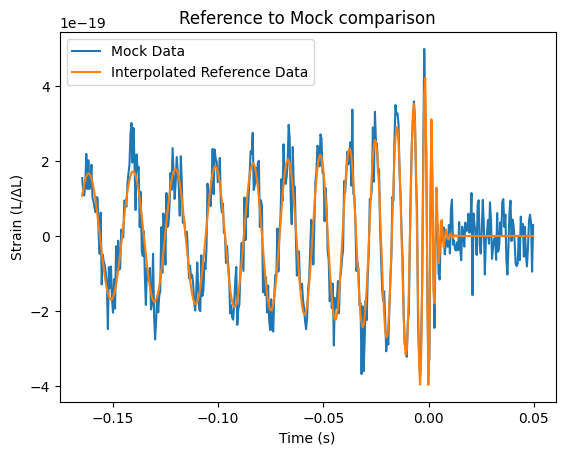

In [124]:
plt.plot(mock40M1D['time (s)'], mock40M1D['strain'],label="Mock Data")
plt.plot(mock40M1D['time (s)'],interp_strain, label = "Interpolated Reference Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.title('Reference to Mock comparison')
plt.legend()


Root mean square error to see how well this fits.. can't trust a by-eye.

RMSE was chosen over chi squared as we have not evaluated the noise for the mock data and, from the perspective of this being coursework, I wanted to show other (if related) techniques.

The lower the error between data sets the greater the agreement.

In [53]:
rmse = np.sqrt(np.mean((mock40M1D['strain'] - interp_strain)**2))
print(f"RMSE: {rmse:.3e}")

RMSE: 5.355e-20


With the error value provided by the RMSE being at least an order of magnitude under our strain values I am happy to accept this as a good fit.

***

## Part D - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") [24 marks]

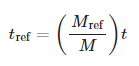

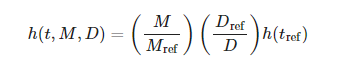

PART **D.1**

I have cut the 2 equations given in the week 8 notebook to help guide me in the construction of a function that will scale any wave to the mass and distance values taken, and interpolate it match the received time array.

I will read the file for the reference wave again in the function, to keep everything internal.

The first thing is to 'invert' the time scaling equation as we have the tref and want t

$$t_{ref}(\frac{M}{M_{ref}}) = t $$

In [125]:
def waveScaling(M,D,times):
  '''using the 40M and 1Mpc ReferenceWave, scale by given Mass and Distance
  return scaledRefWave['time'] scaledRefWave['strain']'''
  #Prepare the data
  refWave = pd.read_csv('/content/reference_waveform_40Msun_1Mpc.csv')
  scaledRefWave = refWave.copy() #This extra line was auto suggested to me and I thought it was a good idea

  #Sacle with maths
  timeScale = M/40 #reverse from notes as we're working on tref not t
  strainScale = (M/40) * (1/D)
  scaledRefWave['time (s)'] = refWave['time (s)'] * timeScale
  scaledRefWave['strain'] = refWave['strain'] * strainScale

  #Interpolate to match needed timestamps
  interp_fn = interp1d(scaledRefWave['time (s)'],scaledRefWave['strain'],bounds_error=False)
  interp_strain = interp_fn(times)

  return times, interp_strain


As suggested in part **D.2** we will test the scaling function with the 70 solar mass mock data.

First we must load the data and check its validity in the usual way (print headers and plot)

         strain  time (s)
0 -1.934524e-20 -0.164658
1 -4.436423e-20 -0.164170
2 -4.776572e-20 -0.163681
3 -4.637995e-20 -0.163193
4 -6.529435e-20 -0.162704


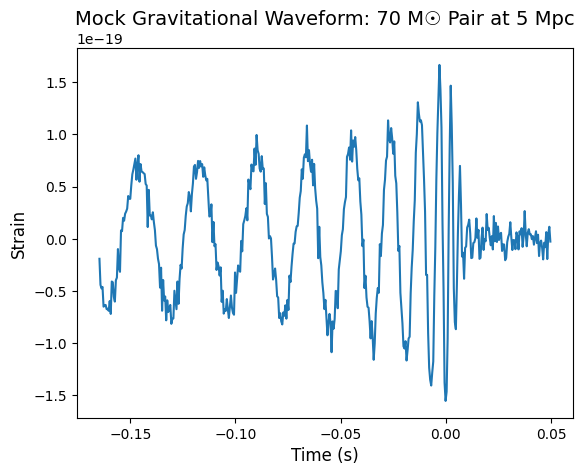

In [55]:
mock70M5D = pd.read_csv('/content/mockdata_waveform_70Msun_5Mpc.csv')
print(mock70M5D.head())

plt.plot(mock70M5D['time (s)'], mock70M5D['strain'])
plt.title('Mock Gravitational Waveform: 70 M☉ Pair at 5 Mpc', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.show()


With the data checked we can now send the expected values of 70 solar masses and 5Mpc to the scaling function

In [56]:
'''test function with the 70M and 5Mpc Values
in pandas for consistancy'''
time70M5D, strain70M5D = waveScaling(70,5,mock70M5D['time (s)'])
scaled70M5D = pd.DataFrame({'time': time70M5D, 'strain': strain70M5D})
print(scaled70M5D.head())

       time        strain
0 -0.164658 -5.300246e-20
1 -0.164170 -5.651048e-20
2 -0.163681 -5.979221e-20
3 -0.163193 -6.220414e-20
4 -0.162704 -6.423488e-20


This has given us a new wave, from the reference wave, that has been scaled to the required values.. let's plot and see that the time range is correct

Text(0, 0.5, 'Strain (L/ΔL)')

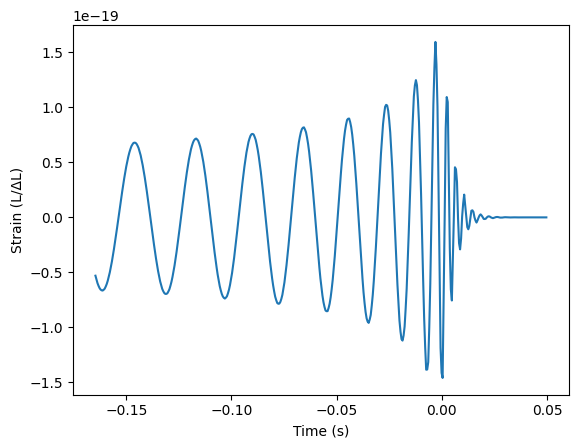

In [57]:
plt.plot(scaled70M5D['time'],scaled70M5D['strain'])
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')


As everything appears to be fine with the data, we can overlay both this scaled reference wave and the mock data to compare results


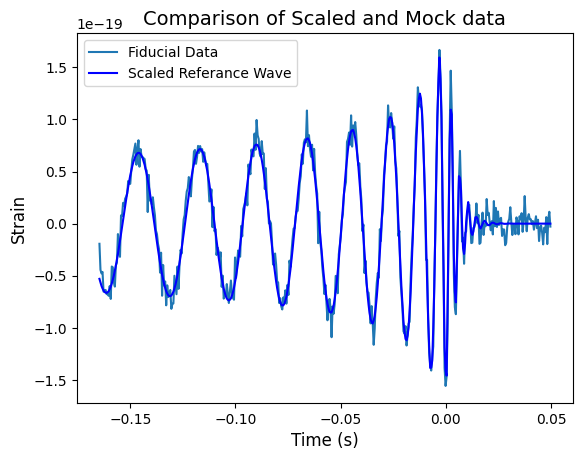

In [58]:
plt.plot(mock70M5D['time (s)'], mock70M5D['strain'], label ="Fiducial Data")
plt.plot(scaled70M5D['time'], scaled70M5D['strain'],"b",label ="Scaled Reference Wave")
plt.title('Comparison of Scaled and Mock data', fontsize=14)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Strain', fontsize=12)
plt.legend()
plt.show()

In [59]:
rmse70 = np.sqrt(np.mean((mock70M5D['strain'] - scaled70M5D['strain'])**2))
print(f"RMSE: {rmse70:.3e}")

RMSE: 1.038e-20


To comment on this result: I once again performed a RMSE and received a similar RSME result as the unscaled reference wave with the matching 40 solar mass mock data. We can say that we fail to reject this match.
The main source of extra noise is almost certainly coming from the post ringdown segment of the wave and some variance in the peaks of the strain.



---



Part **D.3**
To make a "By-eye" estimate of the masses and distance of the merge event, I took inspiration from the animation provided by Chris North. By starting with a large mass and distance we can scale the "frequency" of the waves by lowering the mass of the system and making the peaks line up. Then scale the amplitude by moving the distance of the event from the detector.

For upper bounds on Mass I looked at the LIGO-Virgo collaboration data and found the largest detected merger in observation run 1 to be ~160 Solar Masses. As an upper bound of the distance I took the radius of the observable universe ~4000Mpc.

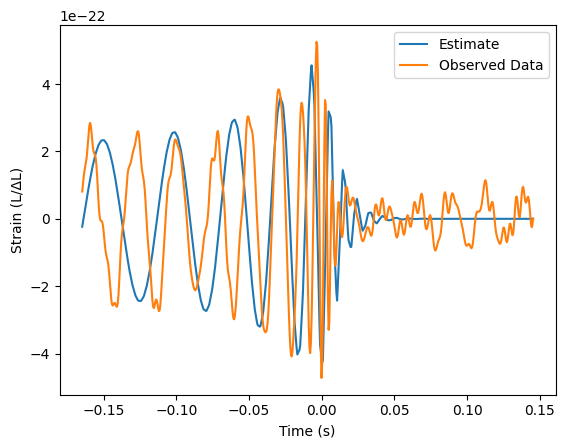

In [60]:
timeUpper, strainUpper = waveScaling(160,4000,ObsGravWav['mergeTime'])


plt.plot(timeUpper,strainUpper,label="Estimate")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

Looking at the graph we can see that the blue estimate is a much lower frequency wave.. corresponding to the longer orbit time that 2 larger black holes would have in their final moments compared to a smaller black hole pair. The 2 larger black hole event horizons would have to physically overlap to get an orbit closer.. So we need to lower the mass of the system.

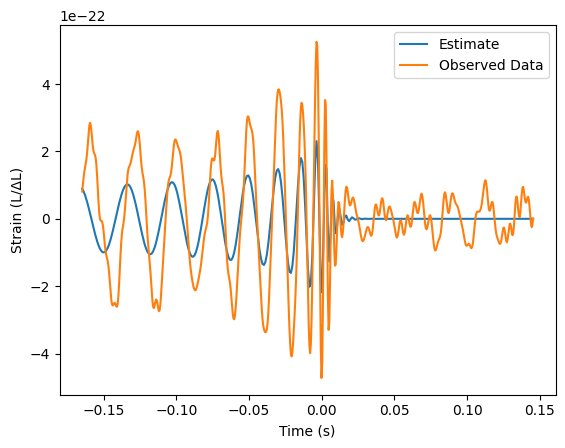

In [61]:
timeMassMove, strainMassMove = waveScaling(80,4000,ObsGravWav['mergeTime'])


plt.plot(timeMassMove,strainMassMove,label="Estimate")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

Rather than leave many code blocks showing my path to this value I asked generative AI to make a series of plots to display my progess.


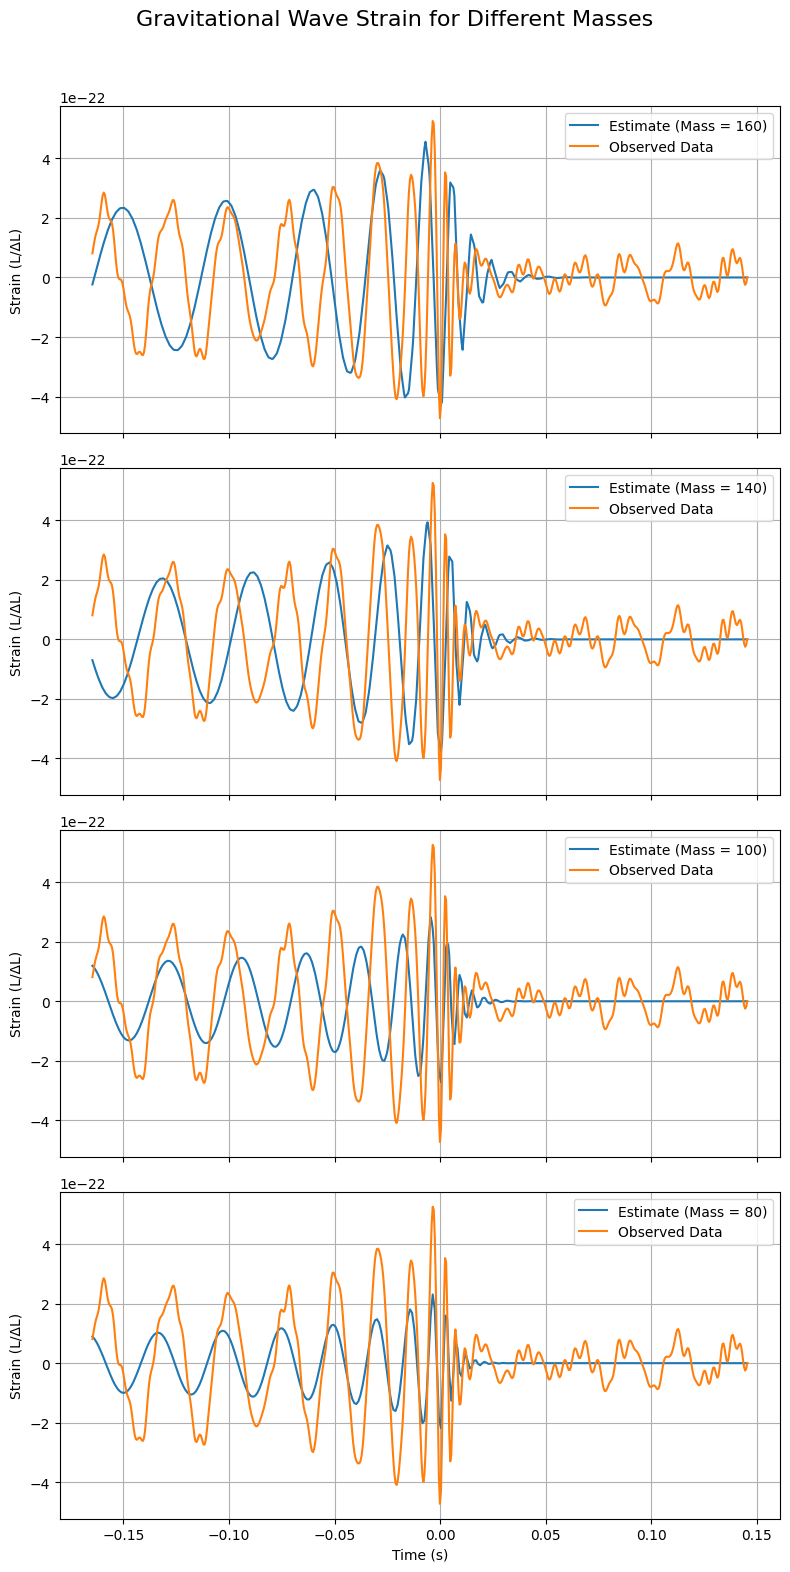

In [ ]:
'''Use chatGPt to make a series of subplots showing all the steps I took to arrive at the above plot'''
# Masses to iterate over
masses = [160, 140, 100, 80]

# Create subplots: one for each mass
fig, axs = plt.subplots(len(masses), 1, figsize=(8, len(masses) * 4), sharex=True)
fig.suptitle("Gravitational Wave Strain for Different Masses", fontsize=16)

# Loop through each mass, compute, and plot
for i, mass in enumerate(masses):
    timeMassMove, strainMassMove = waveScaling(mass, 4000, ObsGravWav['mergeTime'])

    # Plot on the respective subplot
    axs[i].plot(timeMassMove, strainMassMove, label=f"Estimate (Mass = {mass})")
    axs[i].plot(ObsGravWav['mergeTime'], ObsGravWav['strain'], label="Observed Data")

    axs[i].set_ylabel('Strain (L/ΔL)')
    axs[i].legend()
    axs[i].grid(True)

# Add shared x-label and adjust layout
plt.xlabel('Time (s)')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
plt.show()


In a few steps with masses of 160, 140, 100, 80 solar masses we can see the 2 shapes begin to converge. In personal time I fiddled with it to find a "best by eye fit" of 77 solar masses.

The same tactic could now be used to narrow in on a likely distance parameter.

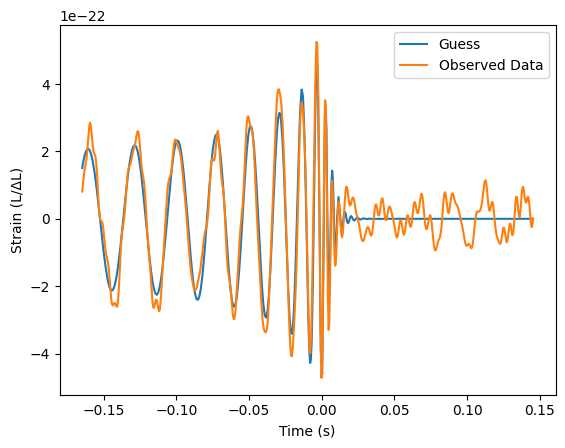

In [ ]:
time, strain = waveScaling(77,1800,ObsGravWav['mergeTime'])


plt.plot(time,strain,label="Guess")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data")
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

Having now performed this matching manually (following the brilliant gif from Chris North) we have achieved a great by-eye fit and feel confident coding a similar process.

RESULTS: MASS 77 solar mass and 1800Mpc DISTANCE

Huge mass ~5 billion light years away (about half the universe away if you want to be poetic)

***

## Part E - Estimating the total mass using MCMC [75 marks]

To use a Monte Carlo Markov Chain on this problem, I will be using the Metropolis-Hastings Algorithm.

We start with the initial conditions M, D, and add a small value to each, drawn from a normal distribution.

We then calculate the 'likelihood' of this set of parameters with a chi squared test.
The likelihood multiplied with the prior is proportional to the posterior, and if our new posterior is higher than the last we keep it.
If it is lower we take a ratio of newPosterior to lastPosterior, if that number is more or equal to a random number between 0 and 1 we still accept the new values. If not we retain the old values. In either outcome we then start the process over.
In this case the prior is assumed to be a Gausian.

$$P(data|M,D) ∝ \exp(-\frac{χ^2(M,D)}{2}) $$

where

$$χ^2(M,D) = ∑\frac{(Strain_{a,i}-Strain_{b,i})^2}{σ^2}$$

In [126]:
'''chi squared = sum ((model[i]-reference[i])^2/stdDev^2) '''
def chiSqr(x,y,sigma):
  residual = (x - y)**2
  return (residual / (sigma ** 2)).sum()

'''liklihood is proportional to exp{-Chi/2}'''
# def liklihood(x,y,sigma):
#   return np.exp(-(chiSqr(x,y,sigma))/2)

#commented to make a log version
def liklihood(x,y,sigma):
  return -(chiSqr(x, y, sigma)) / 2


#can probably be combined into single liklihood function



def preturb(initialConditions,sigmas):
  pertubations = [np.random.normal(0,sigmas[0]),np.random.normal(0,sigmas[1])]
  newConditions = [ic + p for ic, p in zip(initialConditions, pertubations)]
  return newConditions



I have also included the function needed to add small perturbations to our initial conditions. This is how the Metropolis-Hastings algorithm explores the outcome space, by changing the variables in small gaussian jumps.

The next code block was the one in which I laid out the steps of the MCMC without running a loop, recorded her for as fossil evidence of work.

The steps were


1.   Make a scaled wave of the currently accepted conditions
2.   calculate the Likelihood value when compared to the observed wave
3.   Perturb the current conditions to make a set of proposed conditions
4.   Make scaled wave for perturbed conditions
5.   Calculate Likelihood for pertubed conditions
6.   Calculate the acceptance ratio, the smaller the acceptance ratio, the better the new fit
7.   Accept if small number

While transcribing this process to the looping version i realised my mistake with the acceptance process and updated to the correct current version seen there.

In [66]:
initialConditions = [70,1500]
preturbSigmas = [5,100]

def preturb(initialConditions,sigmas):
  pertubations = [np.random.normal(0,sigmas[0]),np.random.normal(0,sigmas[1])]
  newConditions = [ic + p for ic, p in zip(initialConditions, pertubations)]
  return newConditions

currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop



'''loop'''
currentWave = waveScaling(currentConditions[0],currentConditions[1],ObsGravWav['mergeTime']) #reminder that ObsGravWav['mergeTime'] acts as master clock

currentLiklihood = liklihood(currentWave[1],ObsGravWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

print(currentLiklihood)

proposedConditions = preturb(currentConditions,preturbSigmas)

proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],ObsGravWav['mergeTime'])

proposedLiklihood = liklihood(proposedWave[1],ObsGravWav['strain'],noiseStd)

acceptanceRatio = proposedLiklihood - currentLiklihood

if acceptanceRatio > 1:
  currentConditions = proposedConditions
else:
  currentConditions = initialConditions

-6215.671787313654


After some experimentation I ended up choosing 0.1 and 10 as the sigmas for jump size selection. This was after using [10,100] and [0.0001,0.01] and seeing that the larger value jumped to far back and forth and the small values converged on the mass but the distance did not even after 20,000 iterations.

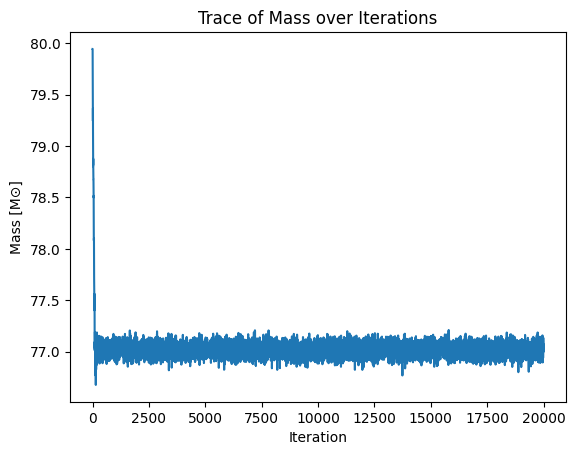

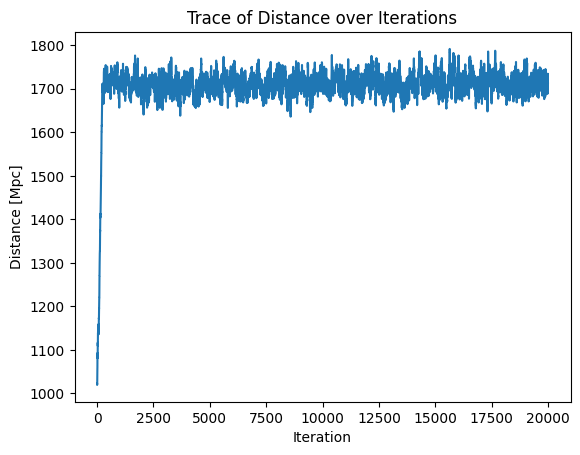

In [67]:
preturbSigmas = [0.1,10]
bigN = int(2e4)
initialConditions = [80,1000]
traceArrayCurrentMain = []
traceArrayPerturbedMain = []
currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop

for N in range(bigN):
  '''loop: First find the "Current" fit'''
  currentWave = waveScaling(currentConditions[0],currentConditions[1],trimmedObsWav['mergeTime']) #interps ref to matched trimobs
  currentLiklihood = liklihood(currentWave[1],trimmedObsWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

  '''Now fit for proposed values'''
  proposedConditions = preturb(currentConditions,preturbSigmas)
  traceArrayPerturbedMain.append(proposedConditions)
  proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],trimmedObsWav['mergeTime'])
  proposedLiklihood = liklihood(proposedWave[1],trimmedObsWav['strain'],noiseStd)

  acceptanceRatio = proposedLiklihood - currentLiklihood

  if acceptanceRatio > 1:
    currentConditions = proposedConditions
  elif np.random.rand() < np.exp(acceptanceRatio):
    currentConditions = proposedConditions

  traceArrayCurrentMain.append(currentConditions)

plt.plot(range(bigN), [item[0] for item in traceArrayCurrentMain])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(bigN), [item[1] for item in traceArrayCurrentMain])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Trace of Distance over Iterations")
plt.show()

To be sure that we had not fallen into a local minimum I ran 2 more MCMC with different initial conditions one starting at our previously derived maximums of 150 solar masses and 4000Mpc, and the other was with minimums of 1 solar mass and 1Mpc. Both 1's are unphysical, but act as a first guess on a lower bound.

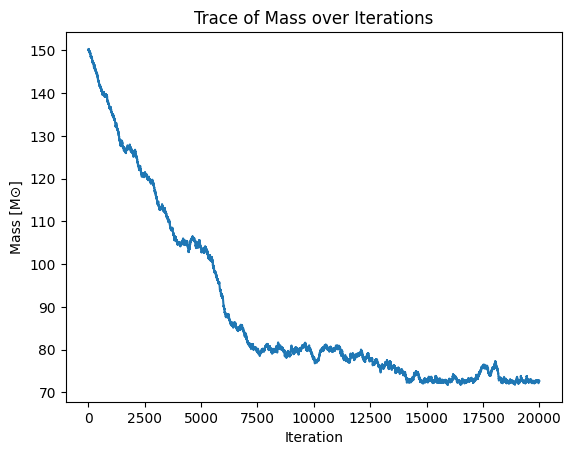

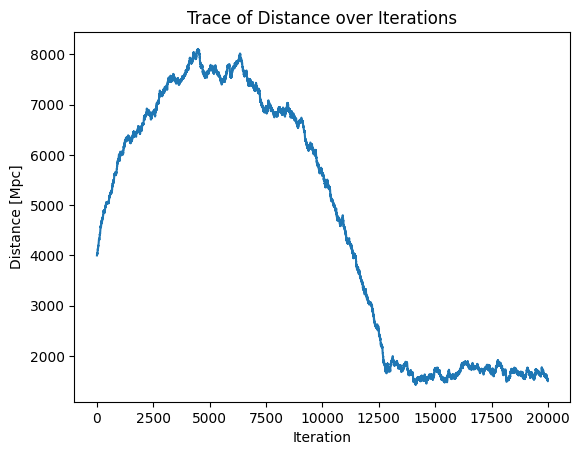

In [ ]:
bigN = int(2e4)
initialConditions = [150,4000]
traceArrayCurrent = []
traceArrayPerturbed = []
currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop

for N in range(bigN):
  '''loop: First find the "Current" fit'''
  currentWave = waveScaling(currentConditions[0],currentConditions[1],trimmedObsWav['mergeTime']) #interps ref to matched trimobs
  currentLiklihood = liklihood(currentWave[1],trimmedObsWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

  '''Now fit for proposed values'''
  proposedConditions = preturb(currentConditions,preturbSigmas)
  traceArrayPerturbed.append(proposedConditions)
  proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],trimmedObsWav['mergeTime'])
  proposedLiklihood = liklihood(proposedWave[1],trimmedObsWav['strain'],noiseStd)

  acceptanceRatio = proposedLiklihood - currentLiklihood

  if acceptanceRatio > 1:
    currentConditions = proposedConditions
  elif np.random.rand() < np.exp(acceptanceRatio):
    currentConditions = proposedConditions

  traceArrayCurrent.append(currentConditions)

plt.plot(range(bigN), [item[0] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(bigN), [item[1] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Trace of Distance over Iterations")
plt.show()

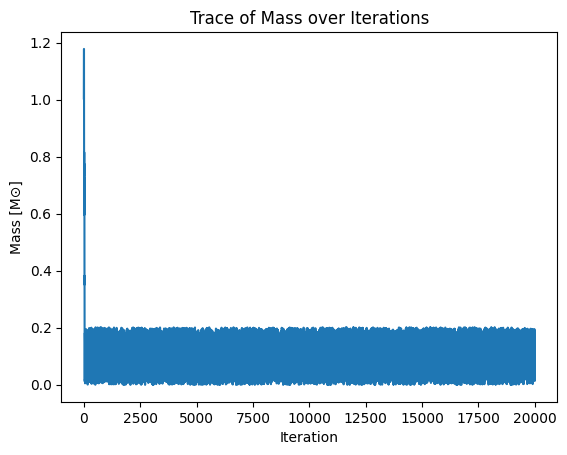

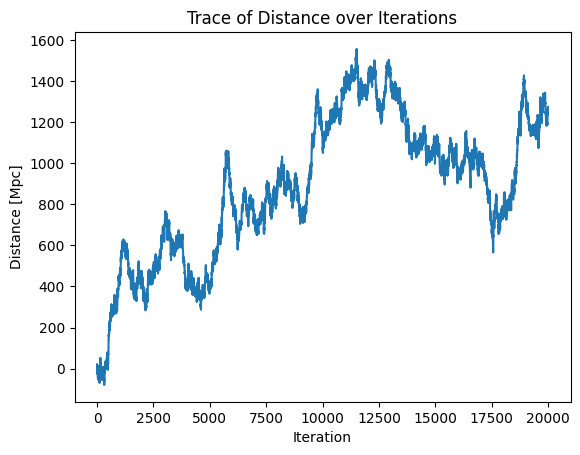

In [ ]:
bigN = int(2e4)
initialConditions = [1,1]
traceArrayCurrent = []
traceArrayPerturbed = []
currentConditions = initialConditions.copy() #helps with my logic, we will be comparing to curent at the end of each loop

for N in range(bigN):
  '''loop: First find the "Current" fit'''
  currentWave = waveScaling(currentConditions[0],currentConditions[1],trimmedObsWav['mergeTime']) #interps ref to matched trimobs
  currentLiklihood = liklihood(currentWave[1],trimmedObsWav['strain'],noiseStd) #noise from all the way back in part B, Taken as constant over time period

  '''Now fit for proposed values'''
  proposedConditions = preturb(currentConditions,preturbSigmas)
  traceArrayPerturbed.append(proposedConditions)
  proposedWave = waveScaling(proposedConditions[0],proposedConditions[1],trimmedObsWav['mergeTime'])
  proposedLiklihood = liklihood(proposedWave[1],trimmedObsWav['strain'],noiseStd)

  acceptanceRatio = proposedLiklihood - currentLiklihood

  if acceptanceRatio > 1:
    currentConditions = proposedConditions
  elif np.random.rand() < np.exp(acceptanceRatio):
    currentConditions = proposedConditions

  traceArrayCurrent.append(currentConditions)

plt.plot(range(bigN), [item[0] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(bigN), [item[1] for item in traceArrayCurrent])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Trace of Distance over Iterations")
plt.show()

The perils of trying to divide zero has appeared in the low mass search of the space, causing some issues. But other than that i was actually surprised how robust the algorithm is in this case. Even extreme numbers tended back to the expected values.



---



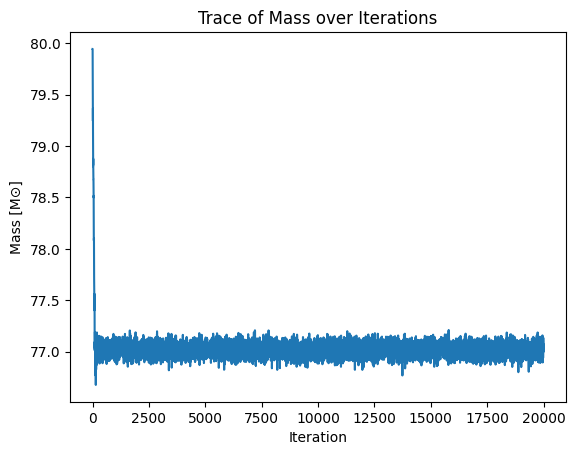

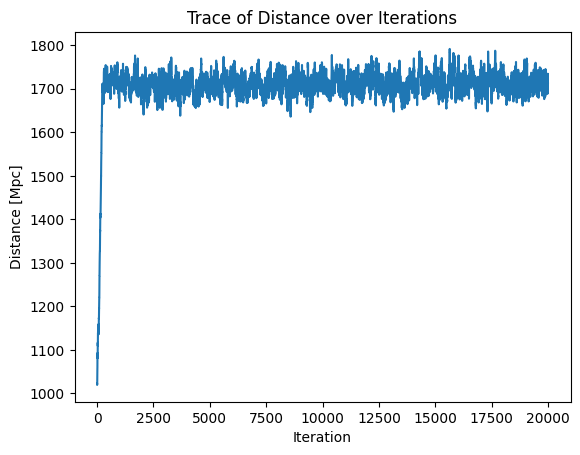

In [68]:
plt.plot(range(bigN), [item[0] for item in traceArrayCurrentMain])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(bigN), [item[1] for item in traceArrayCurrentMain])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Trace of Distance over Iterations")
plt.show()

To analyse the MCMC data for PART **E.2** we will be using the values stored in traceArrayCurrentMain. I have also reproduced the values over iterations graph for the first 'main' MCMC.

Visually we can see the burn in process was very fast, thanks in part to close initial conditions. We will start with an estimated 300
steps for burn in and replot


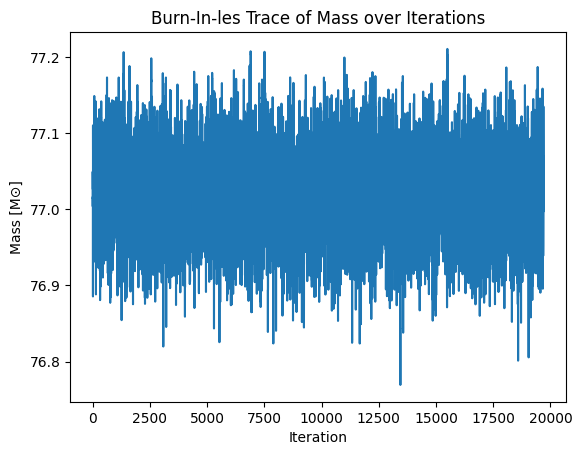

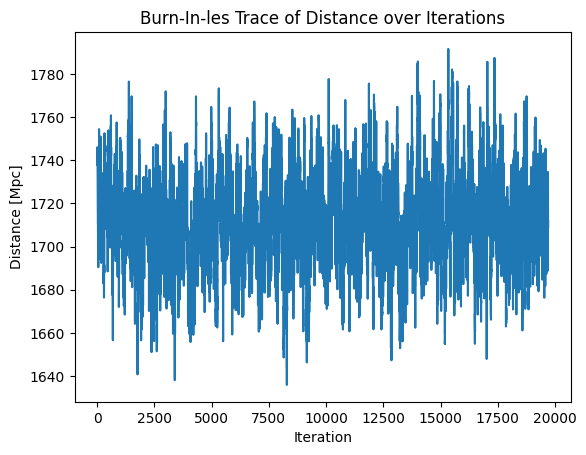

In [75]:
noBurnTrace = traceArrayCurrentMain[300:]

plt.plot(range(len(noBurnTrace)), [item[0] for item in noBurnTrace])
plt.xlabel("Iteration")
plt.ylabel("Mass [M⊙]")
plt.title("Burn-In-les Trace of Mass over Iterations")
plt.show()
plt.figure()
plt.plot(range(len(noBurnTrace)), [item[1] for item in noBurnTrace])
plt.xlabel("Iteration")
plt.ylabel("Distance [Mpc]")
plt.title("Burn-In-les Trace of Distance over Iterations")
plt.show()

Taking the very small slice of 300 steps off the front of both arrays leaves us with values floating around a single value.. showing a lack of burn in as required

To check for convergence we shall take medians for batches of 500 from the end of the markov chain. if they are all very similar or tended towards it then we can say they converged

In [77]:
batchSize = 500

# Compute medians for batches starting from the end
medians_mass = []
medians_distance = []


for start in range(len(noBurnTrace) - batchSize, -1, -batchSize):
    batch = noBurnTrace[max(0, start):start + len(noBurnTrace)]  # Get the current batch
    medians_mass.append(np.median([item[0] for item in batch]))
    medians_distance.append(np.median([item[1] for item in batch]))

# Result
print("Medians of the first elements in each batch:", medians_mass)
print("Medians of the second elements in each batch:", medians_distance)

Medians of the first elements in each batch: [77.02827546047895, 77.02015133609865, 77.01993560600371, 77.01993560600371, 77.01557164192982, 77.01495296880933, 77.0161419650135, 77.01604833689427, 77.01836137241332, 77.01818331876507, 77.01927512332233, 77.01951220757577, 77.02046073856442, 77.02046073856442, 77.02038568864457, 77.02003012546746, 77.01974534072643, 77.02001649184928, 77.0198188883186, 77.02015855306537, 77.02045798439599, 77.02005246743443, 77.01957127831618, 77.01957127831618, 77.0197129629308, 77.01956708855576, 77.01926322213308, 77.0189933075334, 77.01915871121888, 77.01956289879533, 77.01980018647365, 77.0197339026176, 77.01960446194045, 77.01978128694148, 77.01976855804892, 77.01976879868818, 77.0198197430755, 77.01979084773511, 77.01998724221802]
Medians of the second elements in each batch: [1712.7383883642058, 1711.1711853554145, 1711.4938437683763, 1710.9922463774851, 1712.041916972408, 1712.261788023532, 1712.2509793438942, 1712.2821344970398, 1712.693634648

With every single value being withing 1 solar mass for the mass and similar for the distance, we can say they have converged.

In [80]:
MCMCmassMedian = np.median([item[0] for item in noBurnTrace])
MCMCmass95th = np.percentile([item[0] for item in noBurnTrace], 95)
MCMCmass5th = np.percentile([item[0] for item in noBurnTrace], 5)

MCMCdistanceMedian = np.median([item[1] for item in noBurnTrace])
MCMCdistance95th = np.percentile([item[1] for item in noBurnTrace], 95)
MCMCdistance5th = np.percentile([item[1] for item in noBurnTrace], 5)

print(f"MCMC Mass Median: {MCMCmassMedian:.2f}")
print(f"MCMC Mass 90% Credible Interval: [{MCMCmass5th:.2f}, {MCMCmass95th:.2f}]")

print(f"MCMC Distance Median: {MCMCdistanceMedian:.2f}")
print(f"MCMC Distance 90% Credible Interval: [{MCMCdistance5th:.2f}, {MCMCdistance95th:.2f}]")

MCMC Mass Median: 77.02
MCMC Mass 90% Credible Interval: [76.92, 77.12]
MCMC Distance Median: 1711.45
MCMC Distance 90% Credible Interval: [1675.43, 1748.70]


PART **E.3**

reporting the Median mass found in the MCMC as:

MCMC Mass Median: 77.02

MCMC Mass 90% Credible Interval: [76.92, 77.12]

MCMC Distance Median: 1711.45

MCMC Distance 90% Credible Interval: [1675.43, 1748.70]

Comment: With 90% confidence intervals being very narrow compared to the values, we can see that we have narrowed in on a good value for these variables. The mass 90% confidence interval is only 0.20 Solar masses wide, and the distance 90% confidence interval is only 73Mpc wide.

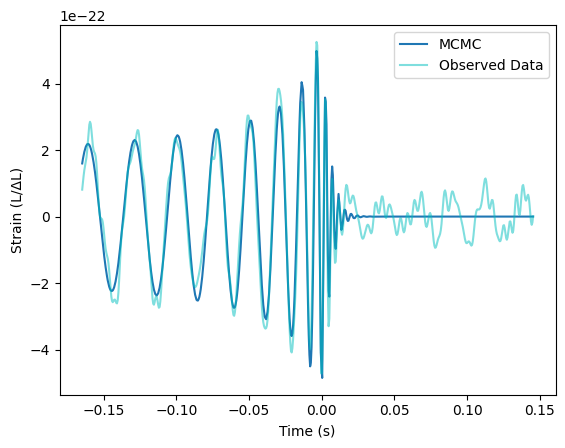

In [84]:
time, strain = waveScaling(77.02,1711.45,ObsGravWav['mergeTime'])


plt.plot(time,strain,label="MCMC")
plt.plot(ObsGravWav['mergeTime'],ObsGravWav['strain'], label ="Observed Data",color = 'c', alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Strain (L/ΔL)')
plt.legend()
plt.show()

***

## Part F - Putting it all together [36 marks]

Part **F.1** To estimate the chirp mass we can use the formula:

$$M_{ch} = \frac{(M_1M_2)^\frac{3}{5}}{(M_1+M_2)^\frac{1}{5}}$$

it is also wise to understand the conditions of some of our earlier functions. For the wavescaling to be valid the mass ratio $$q = \frac{M_2}{M_1} = 1$$ this implies that $$M_1 = M_2 = \frac{M}{2}$$


Therefore both masses of BH must be 77.02/2 = 38.01 solar masses

to put this back in to the chirp mass formula

$$M_{ch} = \frac{(38.51^2)^\frac{3}{5}}{(2\times38.51)^\frac{1}{5}} ≈33.52 M_\odot$$

Comment on masses: Given that the largest Neutron star that can support itself under gravity is thought to be 3-4 solar masses these 2 objects are hard to explain without calling them black holes. Well short of the Millions of solar masses to class them as supermassive, so very much black holes in the stella range.

To estimate the period of the orbiting pair, I first need to find the period of the gravity wave. Its important to remember in this symetrical system the period of the wave is half the orbital period. To determine the period I will directly measure the position of the peaks and subtract the times of one from the other to get the spacing.

Scipy has a very handy utility called find_peaks which i shall be making use of.

8     -0.160751
74    -0.128525
134   -0.099228
189   -0.072372
237   -0.048935
278   -0.028915
309   -0.013779
330   -0.003525
342    0.002335
352    0.007217
361    0.011612
370    0.016007
379    0.020401
388    0.024795
396    0.028702
405    0.033096
414    0.037491
423    0.041885
Name: mergeTime, dtype: float64


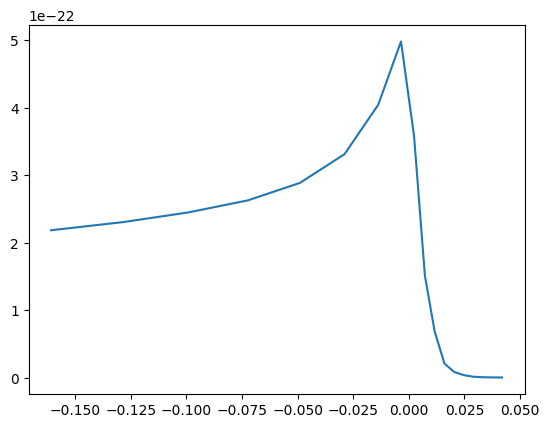

In [128]:
from scipy.signal import find_peaks
# Find peaks: gives list of indices
peaks, _ = find_peaks(strain)

# Calculate time differences between consecutive peaks
peak_times = time[peaks]
periods = np.diff(peak_times)

plt.plot(peak_times,strain[peaks]) # this is the envolope of the highest peaks

print(peak_times)

Looking in the list of peak times, we can see the last 2 peaks that occur before the merger. That corresponds to the index in periods of 6 (physically counted the gaps in the data)

In [108]:
print(f"The final period measurment for the gravity wave is {periods[6]:.3e}s")
orbitalPeriod = 2*periods[6]
print(f"this makes the black holes orbital period {orbitalPeriod:.3e}s")

The final period measurment for the gravity wave is 1.025e-02s
this makes the black holes orbital period 2.051e-02s


**PART F.2** Wave period just before merger is : $$0.01025s$$


---



**PART F.3**

If the 2 objects are not spinning and are in circular keplerian orbits then the orbital seperation can be estimated from:

$$R = (\frac{G(M_1+M_2)}{ω_{max}^2})^\frac{1}{3}$$

where $$ω = \frac{2π}{Period}$$

In [116]:
ω = (2*np.pi) / orbitalPeriod
G = 6.67408*10**-11
M1 = M2 = 38.51

R = np.cbrt( (G*(M1+M2)) / (ω**2) )

print(f'The seperation between objects at merger is estimated to be {R:.3e}m')
#print(f'The seperation between objects at merger is estimated to be {R:.10f}m')

The seperation between objects at merger is estimated to be 3.797e-05m
The seperation between objects at merger is estimated to be 0.0000379744m


**PART F.4**

This is phenomenoly close! 38.51 solar masses in a radius of 3.8e-5m. I am curious as to the density and I hope you are to:

In [122]:
solarMass = 2e30
volume = (4/3) * np.pi * (3.8e-5**3)
density = (38.51*solarMass) / volume
print(f"The density is {density:.3e} Kg/m^3")

The density is 3.351e+44 Kg/m^3


We are well over the typical density for neutron stars of $$~5\times10^{17}Kg/m^3$$ These have to be black holes if general relativity is a good description for the physics here. (and we DO believe that to be true)

An interesting observation here is the speed with which the pair are orbiting:

$$Speed = \frac{Distance}{Time}$$

As I have a radius and a period I should be able to solve this instantanious speed just before merger:

$$Distance = OrbitalCircumference = 2\pi r $$

Here r would be half the orbital seperation (R form earlier) $$r = R/2$$

combining the 2 equations $$OrbitalCircumference = \frac{2\pi R}{2}$$

$$= \pi R = 3.797\times10^{-5}m ⋅\pi = 1.19\times10^{-4}m$$

And time is the Orbital period from earlier

$$Speed = \frac{ 1.19\times10^{-4}m}{2.051\times10^{-2}s} = 5.816\times10^{-3}m/s$$

Much slower than I was expecting, but it should not be to surprising as the reason these 2 are merging is beacuse they are losing kinetic energy to the gravitational waves

***

## Evidence of Understanding, Presentation and Interpretation [20 marks]

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>

I declare that I have used Generative AI software to support me in producing parts of this work. I have used Gen AI in line with the usage defined by the assessment guidance and have maintained academic integrity throughout my work. I have rewritten any Gen AI content in my own words and validated it through using reliable independent sources.

I understand that declaring the use of GenAI tools will not lead to a lower mark, provided that my use is in accordance with the assessment guidelines and I maintain academic integrity.

I acknowledge my use of AI tools in this question for help with searching though multidimentional arrays and dataframes. For help with plotting sequences of graphs. And some LaTeX help as I am only 2 weeks in learning it and my code broke the conversion process.